# Microbiome data analysis with R

## Phyloseq

In [1]:
library(dplyr)
library(tidyr)
library(phyloseq)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Load biom

In [2]:
biom_otu_tax = import_biom('../../data/Qiime_Introduction_Tutorial/pick_otus/otu_table_mc2_w_tax.biom')
biom_otu_tax

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3465 taxa and 34 samples ]
tax_table()   Taxonomy Table:    [ 3465 taxa by 7 taxonomic ranks ]

## Adding mapping file

In [3]:
m = read.delim('../../data/Qiime_Introduction_Tutorial/mapping_file.txt', sep='\t', row.names=1)
m %>% head(n=3)

,BarcodeSequence,LinkerPrimerSequence,SampleType,Year,Month,Day,Subject,ReportedAntibioticUsage,DaysSinceExperimentStart,Description
L1S8,AGCTGACTAGTC,GTGCCAGCMGCCGCGGTAA,gut,2008,10,28,1,Yes,0,1_Fece_10_28_2008
L1S140,ATGGCAGCTCTA,GTGCCAGCMGCCGCGGTAA,gut,2008,10,28,2,Yes,0,2_Fece_10_28_2008
L1S57,ACACACTATGGC,GTGCCAGCMGCCGCGGTAA,gut,2009,1,20,1,No,84,1_Fece_1_20_2009


In [4]:
biom_otu_tax = phyloseq(otu_table(biom_otu_tax),
                        tax_table(biom_otu_tax),
                        sample_data(m))
biom_otu_tax

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3465 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 3465 taxa by 7 taxonomic ranks ]

# Dataset summary

In [5]:
ntaxa(biom_otu_tax)

[1] 3465

In [6]:
nsamples(biom_otu_tax)

[1] 34

In [7]:
sample_names(biom_otu_tax)

[1] "L1S140" "L1S208" "L1S8"   "L1S281" "L3S242" "L2S309" "L2S357" "L4S112"
 [9] "L2S155" "L2S382" "L4S63"  "L2S222" "L3S341" "L3S360" "L2S204" "L4S137"
[17] "L3S294" "L2S175" "L5S203" "L6S93"  "L6S20"  "L6S68"  "L1S257" "L3S378"
[25] "L1S105" "L5S174" "L5S155" "L5S222" "L5S104" "L1S57"  "L1S76"  "L5S240"
[33] "L3S313" "L2S240"

In [8]:
sample_variables(biom_otu_tax)

[1] "BarcodeSequence"          "LinkerPrimerSequence"    
 [3] "SampleType"               "Year"                    
 [5] "Month"                    "Day"                     
 [7] "Subject"                  "ReportedAntibioticUsage" 
 [9] "DaysSinceExperimentStart" "Description"

# Parsing the dataset

In [9]:
sample_data(biom_otu_tax) 

,BarcodeSequence,LinkerPrimerSequence,SampleType,Year,Month,Day,Subject,ReportedAntibioticUsage,DaysSinceExperimentStart,Description
L1S140,ATGGCAGCTCTA,GTGCCAGCMGCCGCGGTAA,gut,2008,10,28,2,Yes,0,2_Fece_10_28_2008
L1S208,CTGAGATACGCG,GTGCCAGCMGCCGCGGTAA,gut,2009,1,20,2,No,84,2_Fece_1_20_2009
L1S8,AGCTGACTAGTC,GTGCCAGCMGCCGCGGTAA,gut,2008,10,28,1,Yes,0,1_Fece_10_28_2008
L1S281,CCTCTCGTGATC,GTGCCAGCMGCCGCGGTAA,gut,2009,4,14,2,No,168,2_Fece_4_14_2009
L3S242,ACAGTTGCGCGA,GTGCCAGCMGCCGCGGTAA,right palm,2008,10,28,1,Yes,0,1_R_Palm_10_28_2008
L2S309,CGTGCATTATCA,GTGCCAGCMGCCGCGGTAA,left palm,2009,1,20,2,No,84,2_L_Palm_1_20_2009
L2S357,CTAACGCAGTCA,GTGCCAGCMGCCGCGGTAA,left palm,2009,3,17,2,No,140,2_L_Palm_3_17_2009
L4S112,GCGTTACACACA,GTGCCAGCMGCCGCGGTAA,right palm,2009,3,17,2,No,140,2_R_Palm_3_17_2009
L2S155,ACGATGCGACCA,GTGCCAGCMGCCGCGGTAA,left palm,2009,1,20,1,No,84,1_L_Palm_1_20_2009
L2S382,CTCAATGACTCA,GTGCCAGCMGCCGCGGTAA,left palm,2009,4,14,2,No,168,2_L_Palm_4_14_2009


## Selecting particular samples 

In [10]:
subset_samples(biom_otu_tax, SampleType == 'gut')

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3465 taxa and 8 samples ]
sample_data() Sample Data:       [ 8 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 3465 taxa by 7 taxonomic ranks ]

## Selecting particular taxa

In [11]:
subset_taxa(biom_otu_tax, Rank2=="p__Bacteroidetes")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 680 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 680 taxa by 7 taxonomic ranks ]

## Filtering taxa with low abundance

In [12]:
# total sum scaling 
biom_otu_tax_TSS = transform_sample_counts(biom_otu_tax, function(x) x / sum(x))

In [13]:
filter_taxa(biom_otu_tax_TSS, function(x) mean(x) > 1e-3, TRUE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 119 taxa by 7 taxonomic ranks ]

# Plotting data

## Alpha diversity

Warning message:
“Removed 68 rows containing missing values (geom_errorbar).”

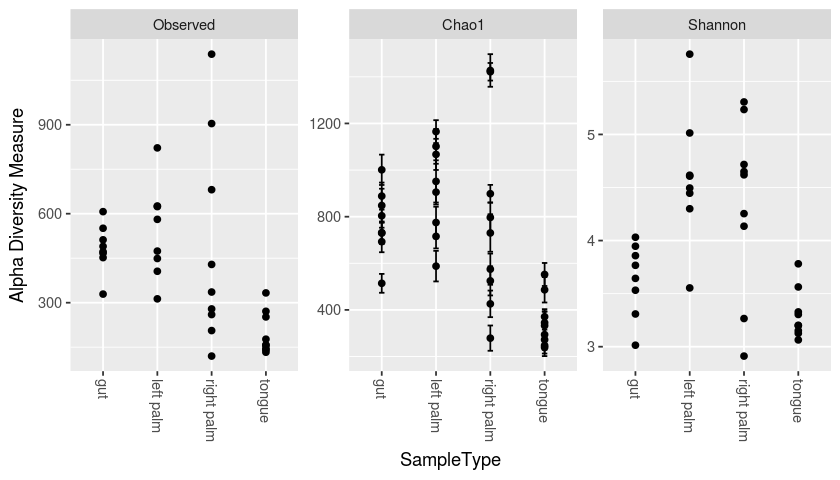

In [14]:
options(repr.plot.height=4)
alpha_meas = c("Observed", "Chao1", "Shannon")
plot_richness(biom_otu_tax, "SampleType", measures=alpha_meas)

## Taxon abundances

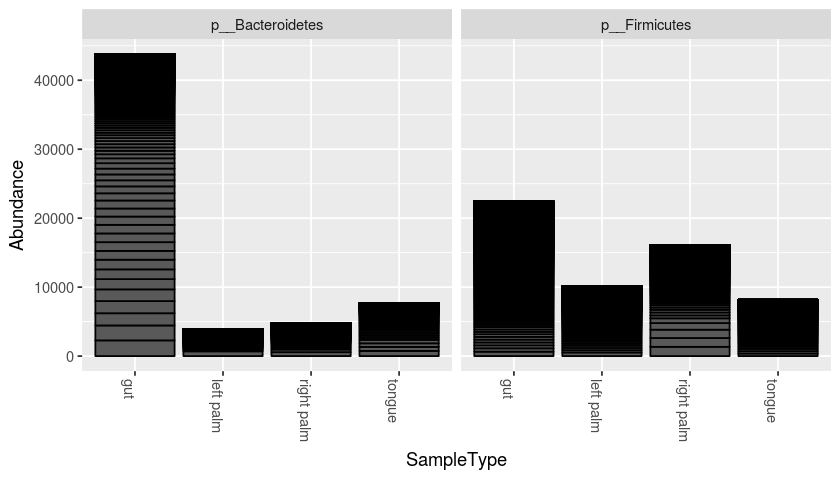

In [15]:
x = subset_taxa(biom_otu_tax, Rank2 %in% c("p__Bacteroidetes", "p__Firmicutes"))
plot_bar(x, "SampleType", facet_grid=~Rank2)

## Ordinations

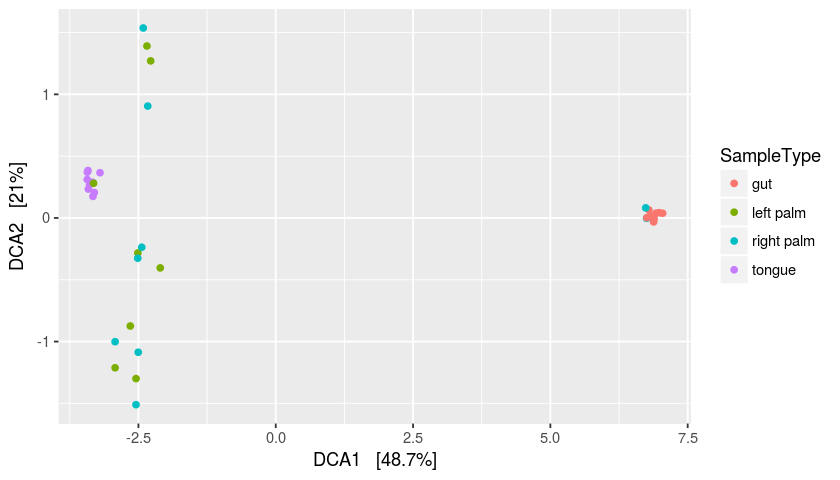

In [16]:
x = ordinate(biom_otu_tax_TSS)
plot_ordination(biom_otu_tax_TSS, x, color="SampleType")

# More resources

[phyloseq website](https://joey711.github.io/phyloseq/index.html)